In [23]:
import os
print(os.getcwd())
os.chdir('D:/handwritten')
print(os.getcwd())

D:\handwritten\models
D:\handwritten


In [24]:
import numpy as np
features_pca = np.load('top100_features_Proportional_90_pca.npy')
labels = np.load('top100_Labels_Proportional.npy')
print("labels：", labels.shape)
print("features_pca：", features_pca.shape)

labels： (60261,)
features_pca： (60261, 92)


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# create LabelEncoder instance
label_encoder = LabelEncoder()

# Convert the string category label to an integer
y_encoded = label_encoder.fit_transform(labels)

# Assign the PCA-processed features to X
X = features_pca

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# SVM
svm = SVC(kernel='linear')  # Choose rbf kernel maybe better
svm.fit(X_train, y_train)

svm_predictions = svm.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        45
           1       0.58      0.52      0.55       312
           2       0.17      0.02      0.03       165
           3       0.53      0.34      0.42        29
           4       0.44      0.46      0.45        35
           5       0.53      0.19      0.28        42
           6       0.68      0.89      0.77      1113
           7       0.72      0.86      0.78        65
           8       0.88      0.84      0.86       964
           9       0.70      0.74      0.72        35
          10       0.72      0.53      0.61        40
          11       0.86      0.58      0.70        55
          12       0.82      0.57      0.67        56
          13       0.33      0.13      0.19        38
          14       0.22      0.19      0.20        26
          15       0.59      0.38      0.46        45
          16       0.31      0.07      0.11        71


In [27]:
from joblib import dump, load
dump(svm, '90_svm_model.joblib')

['90_svm_model.joblib']

In [28]:
import pickle

# Save model
with open('90_svm_model.pickle', 'wb') as f:
    pickle.dump(svm, f)

In [ ]:
# Load model from file
svm_loaded = load('90_svm_model.joblib')

# Make predictions using the loaded model
predictions = svm_loaded.predict(X_test)
print("Loaded model accuracy:", accuracy_score(y_test, predictions))

In [32]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Convert predictions and actual labels back to original string labels
svm_predictions_labels = label_encoder.inverse_transform(svm_predictions)
y_test_labels = label_encoder.inverse_transform(y_test)

# Calculate basic evaluation indicators
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision (Macro-average):", precision_score(y_test, svm_predictions, average='macro'))
print("Recall (Macro-average):", recall_score(y_test, svm_predictions, average='macro'))
print("F1 Score (Macro-average):", f1_score(y_test, svm_predictions, average='macro'))
print("F1 Score (Micro-average):", f1_score(y_test, svm_predictions, average='micro'))
print("F1 Score (Weighted-average):", f1_score(y_test, svm_predictions, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_test_labels, svm_predictions_labels)
print("Confusion Matrix:\n", cm)

# Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, svm_predictions)
print("Matthews Correlation Coefficient:", mcc)

# Detailed classification report
print("Detailed classification report:\n")
print(classification_report(y_test_labels, svm_predictions_labels))


Accuracy: 0.6287231394673525
Precision (Macro-average): 0.4992921979138359
Recall (Macro-average): 0.4396726353712934
F1 Score (Macro-average): 0.45757556933734267
F1 Score (Micro-average): 0.6287231394673525
F1 Score (Weighted-average): 0.6100694896627278
Confusion Matrix:
 [[ 31   0   0 ...   0   0   0]
 [  1 163   3 ...   0   0   0]
 [  0  10   3 ...   0   0   0]
 ...
 [  0   0   0 ...  88   1   0]
 [  0   0   0 ...   0  22   0]
 [  0   2   0 ...   0   0  41]]
Matthews Correlation Coefficient: 0.6121363909132537
Detailed classification report:

              precision    recall  f1-score   support

           !       0.65      0.69      0.67        45
           "       0.58      0.52      0.55       312
           '       0.17      0.02      0.03       165
          's       0.53      0.34      0.42        29
           (       0.44      0.46      0.45        35
           )       0.53      0.19      0.28        42
           ,       0.68      0.89      0.77      1113
           - 

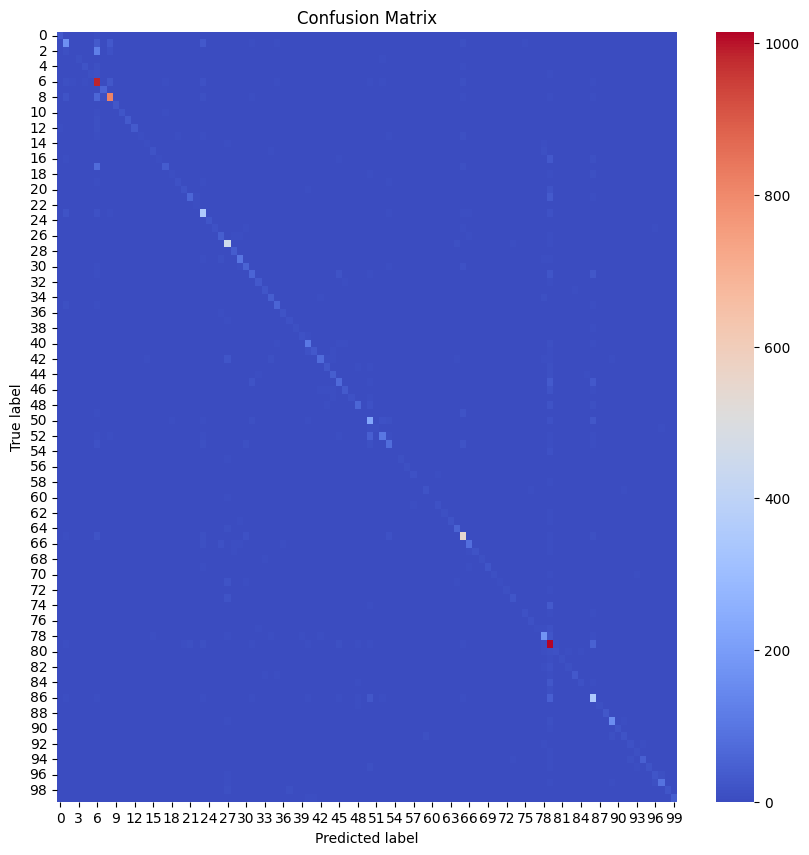

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))  
sns.heatmap(cm, annot=False, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
# Convert predicted integer labels back to original strings if needed
y_pred_labels = label_encoder.inverse_transform(predictions.astype(int))